# QUESTION 1

After a lot of fooling around with ChatGPT, I finally managed to get it to produce a product that satisfied all of the requirements asked for in the question (mind that you need to scroll to the side to see everything). The reason that the range doesn't cover the end of the histogram is that the range is not within the fuill width of the bin which is what makes it look odd. Also I kept the same chat session for the next couple of questions so I'll put the summary at the end of the session.

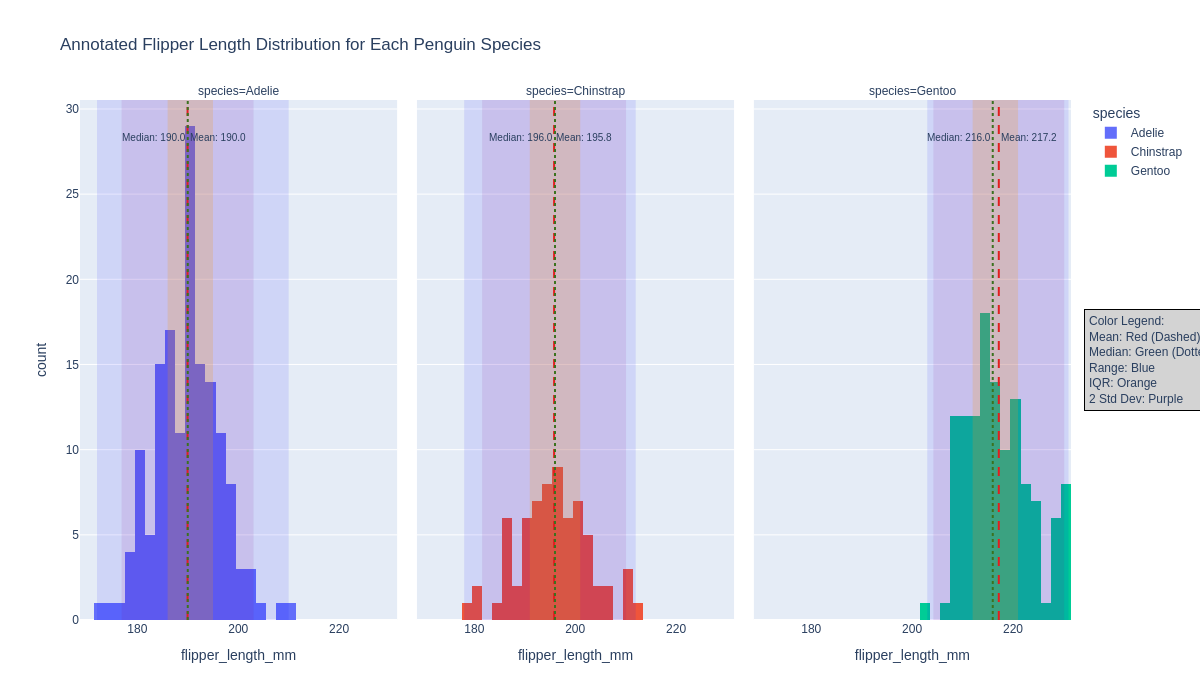

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Create histograms for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species", facet_col="species", nbins=30, title="Flipper Length Distribution by Species")

# Add lines and rectangles for mean, median, range, IQR, and 2-standard deviation range
for specie in penguins['species'].unique():
    specie_data = penguins[penguins['species'] == specie]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = specie_data.mean()
    median_val = specie_data.median()
    min_val = specie_data.min()
    max_val = specie_data.max()
    std_val = specie_data.std()
    iqr_min = specie_data.quantile(0.25)
    iqr_max = specie_data.quantile(0.75)
    std_min = mean_val - 2 * std_val
    std_max = mean_val + 2 * std_val
    
    # Get the corresponding subplot index
    col_index = ["Adelie", "Chinstrap", "Gentoo"].index(specie) + 1
    
    # Adjust label position to be below the species name
    label_y_position = 30  # Adjust this value to move labels down

    # Add vertical lines for mean and median with labels below the species name
    fig.add_vline(x=mean_val, line=dict(color='red', dash='dash'), row=1, col=col_index, annotation_text=f"Mean: {mean_val:.1f}", annotation_position="top right", annotation=dict(font_size=10, showarrow=False, yshift=-label_y_position))
    fig.add_vline(x=median_val, line=dict(color='green', dash='dot'), row=1, col=col_index, annotation_text=f"Median: {median_val:.1f}", annotation_position="top left", annotation=dict(font_size=10, showarrow=False, yshift=-label_y_position))
    
    # Add rectangles for range, IQR, and 2-standard deviation range with original range
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="blue", opacity=0.1, line_width=0, row=1, col=col_index)
    fig.add_vrect(x0=iqr_min, x1=iqr_max, fillcolor="orange", opacity=0.2, line_width=0, row=1, col=col_index)
    fig.add_vrect(x0=std_min, x1=std_max, fillcolor="purple", opacity=0.1, line_width=0, row=1, col=col_index)
    
    # Add annotations for range, IQR, and 2-Std Dev outside the plot
    fig.add_annotation(text="Range", x=min_val, y=-5, showarrow=False, font_size=10, bgcolor="blue", opacity=0.6, row=1, col=col_index, xref="x", yref="y domain")
    fig.add_annotation(text="IQR", x=iqr_min, y=-7, showarrow=False, font_size=10, bgcolor="orange", opacity=0.6, row=1, col=col_index, xref="x", yref="y domain")
    fig.add_annotation(text="2 Std Dev", x=std_min, y=-9, showarrow=False, font_size=10, bgcolor="purple", opacity=0.6, row=1, col=col_index, xref="x", yref="y domain")

# Move the legend to the right of the plot area
fig.add_annotation(text="Color Legend: <br>Mean: Red (Dashed)<br>Median: Green (Dotted)<br>Range: Blue<br>IQR: Orange<br>2 Std Dev: Purple",
                   x=1.15, y=0.5, showarrow=False, font_size=12, align="left", xref="paper", yref="paper", bordercolor="black", borderwidth=1, borderpad=4, bgcolor="lightgrey")

fig.update_layout(height=700, width=1200, title_text="Annotated Flipper Length Distribution for Each Penguin Species", margin=dict(t=100))
fig.show(renderer="png")

# QUESTION 2

I actually got this very nicely right away which was nice and surprising. Also I kept the same chat session for the next couple of questions so I'll put the summary at the end of the session.

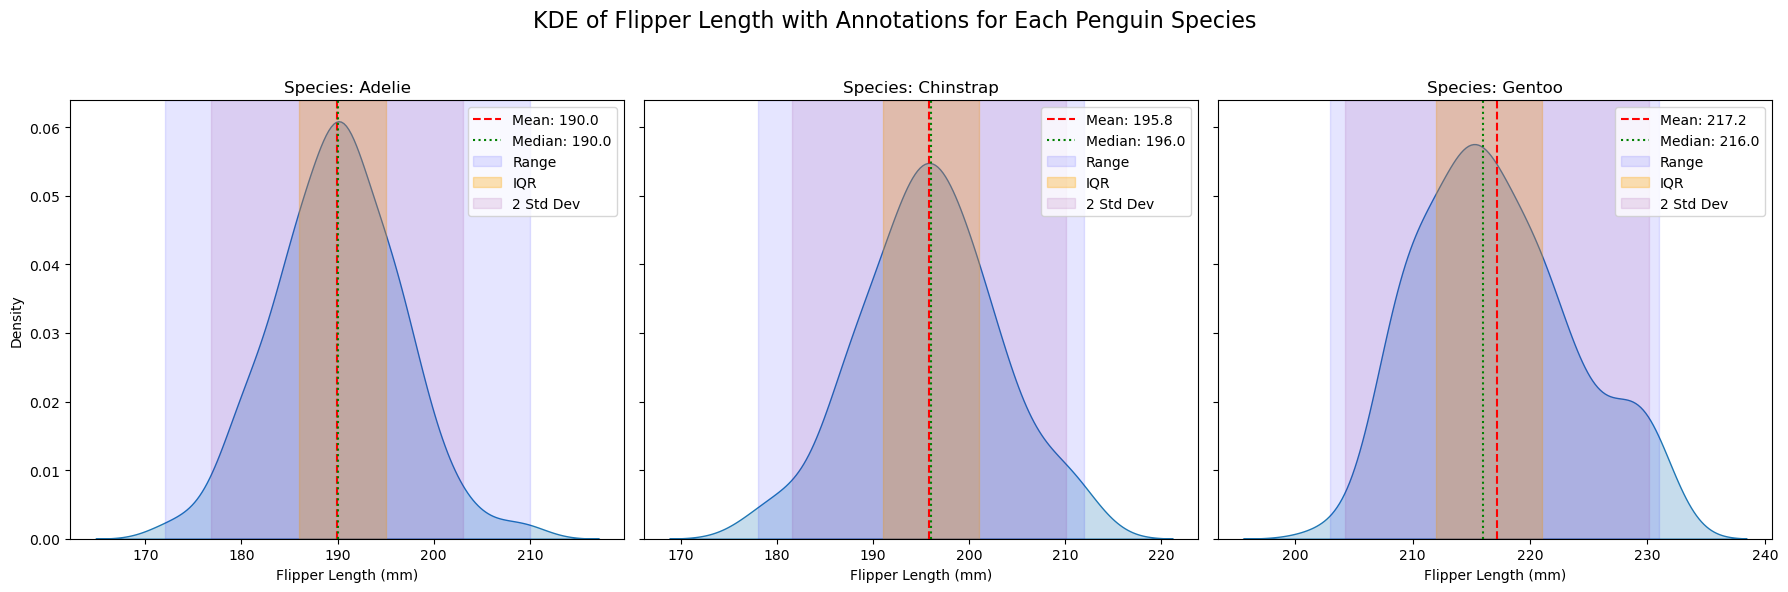

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Set up the matplotlib figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define species list
species_list = penguins['species'].dropna().unique()

# Plot KDE for each species
for ax, specie in zip(axes, species_list):
    specie_data = penguins[penguins['species'] == specie]['flipper_length_mm'].dropna()
    
    # KDE plot
    sns.kdeplot(data=specie_data, ax=ax, fill=True, common_norm=False)
    
    # Calculate statistics
    mean_val = specie_data.mean()
    median_val = specie_data.median()
    min_val = specie_data.min()
    max_val = specie_data.max()
    std_val = specie_data.std()
    iqr_min = specie_data.quantile(0.25)
    iqr_max = specie_data.quantile(0.75)
    std_min = mean_val - 2 * std_val
    std_max = mean_val + 2 * std_val
    
    # Add vertical lines for mean and median
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.1f}')
    
    # Add shaded areas for range, IQR, and 2-standard deviation range
    ax.axvspan(min_val, max_val, color='blue', alpha=0.1, label='Range')
    ax.axvspan(iqr_min, iqr_max, color='orange', alpha=0.3, label='IQR')
    ax.axvspan(std_min, std_max, color='purple', alpha=0.1, label='2 Std Dev')
    
    # Set title and labels
    ax.set_title(f'Species: {specie}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Set the common ylabel
axes[0].set_ylabel('Density')

# Display the plot
plt.suptitle("KDE of Flipper Length with Annotations for Each Penguin Species", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# QUESTION 3

So I talked to ChatGPT and gave it my descriptions and everything (link for Questions 1-3 at the bottom of this question). This is the procon list ChatGPT generated, with my personal preference in the textbox after this one at the bottom: 

Absolutely! Here's a detailed pro-con list for each of these visualization methods: box plots, histograms, and kernel density estimators (KDEs).

1. Box Plots
Pros:

Summarizes Key Statistics:
Quickly shows the median, interquartile range (IQR), and spread of the data.
Identifies potential outliers beyond the whiskers.
Compact and Comparatively Efficient:
Allows easy comparison between multiple groups in a compact form.
Less space-consuming, useful for side-by-side comparisons.
Not Dependent on Binning or Smoothing Parameters:
Provides a direct representation of key data points without the need for additional parameters like bin size or bandwidth.
Cons:

No Visualization of Distribution Shape:
Lacks detail on the actual shape of the distribution, such as skewness, modality, or specific frequency of data points.
No Sample Size Information:
Does not inherently indicate the number of observations, which can obscure differences between datasets of varying sizes.
Limited Detail:
Does not show mean or specific distribution characteristics beyond Q1, Q3, median, and outliers.

2. Histograms
Pros:

Visualizes Distribution Shape:
Provides a clear visualization of the distribution shape, making it easy to identify peaks, gaps, skewness, and modality.
Sample Size Representation:
Each bin height corresponds to the number of observations in that range, giving an intuitive sense of the data density.
Easy to Construct and Interpret:
Histograms are simple to construct and easy for most people to understand at a glance.
Cons:

Sensitive to Bin Size:
The choice of bin size can significantly affect the interpretation of the distribution. Too many bins can make the data look overly noisy, while too few bins can obscure important patterns.
No Summary Statistics:
Does not inherently display summary statistics like the mean, median, or quartiles.
Can Be Misleading:
Can give different impressions of the data depending on how the bins are chosen (e.g., the starting point of the first bin can alter the visualization).

3. Kernel Density Estimators (KDEs)
Pros:

Smooth Representation of Distribution:
Provides a smooth, continuous estimate of the distribution, making it easier to visualize the underlying data structure compared to histograms.
Not Limited by Bins:
Does not require binning of data, avoiding the visual artifacts that can come with histograms.
Better Insight into Distribution:
Useful for identifying multiple modes (peaks) in the data, which can be hidden in histograms with inappropriate bin sizes.
Cons:

Bandwidth Sensitivity:
The choice of bandwidth can heavily influence the KDE plot. Too small can lead to overfitting (too many peaks), while too large can oversmooth the data, hiding important features.
Illusory Data Density:
Can suggest the presence of data in regions with few or no observations, potentially misleading the interpretation of the data distribution.
No Summary Statistics:
Does not directly show key statistics like mean, median, or quartiles. These need to be overlaid or computed separately.
Overall Summary:
Box Plots: Great for quick statistical summaries and comparisons, but limited in visualizing distribution shape.
Histograms: Good for visualizing the distribution shape and frequency but can be misleading with the wrong bin size and lacks summary statistics.
KDEs: Provides a smooth and detailed view of the distribution but is sensitive to bandwidth and can sometimes give misleading impressions of the data density.
Each visualization method serves a unique purpose, and the choice among them depends on what aspect of the data you wish to highlight or explore. Combining these methods can often provide a more comprehensive view of the data.

### My own opinion

Personally, I think that I prefer histograms the most. I think that they are the most intuitive in terms of understanding how the data is distributed, since its super easy to figure out skewness and gaps in the data as well as the modality of the data. I think that the problems with it can be calculated and placed seperately on the side or drawn onto the histogram (as done in number 1), so its biggest downside can be countered quite easily. 

KDEs bother me because the single continuous line can imply that data exists in places with only a few or even no observations, it also suffers from the same problem as histograms, not directly showing any of the important statistics, but it good qualities don't (in my opinion) make up for the bad ones. 

The issue with the boxplots is the exact opposite of that of the histogram and KDE, but whereas with the histogram and KDE the important statistics like mean, median, Q1, Q3 can be calculated seperately and just put on the side, with the boxplot it is significantly harder to do so. There's no easy/obvious solution that shows modality, skewness or gaps like histograms do.

So basically the problems presented by looking at the data are easier to deal with on a histogram than either of the other 2. It's also just generally more intuitive for me, so that's why I prefer histograms as the best way of looking at data.

It should be said that this is in general if I just have to analyze something and look for trends or something", obviously if the question says find the median I'll go right to boxplots.

# QUESTION 4

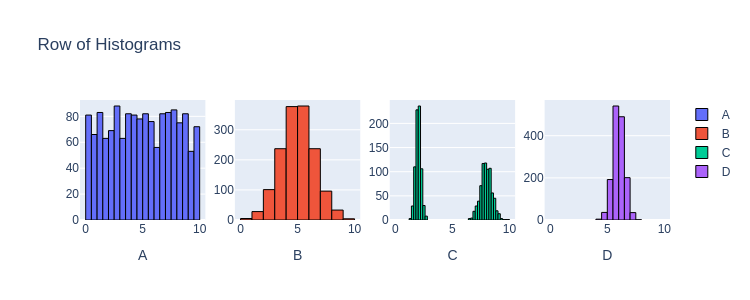

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [5]:
# To calculate mean and varience of the data sets for Part 1
import numpy as np
from scipy import stats

# Generate the datasets
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means
mean_data1 = np.mean(data1)
mean_data2 = np.mean(data2)
mean_data3 = np.mean(data3)
mean_data4 = np.mean(data4)

# Calculate variances (sample variance)
variance_data1 = np.var(data1, ddof=1)  # Sample variance
variance_data2 = np.var(data2, ddof=1)
variance_data3 = np.var(data3, ddof=1)
variance_data4 = np.var(data4, ddof=1)

# Display results
print(f"Means:")
print(f"Data1 (A): {mean_data1:.3f}")
print(f"Data2 (B): {mean_data2:.3f}")
print(f"Data3 (C): {mean_data3:.3f}")
print(f"Data4 (D): {mean_data4:.3f}")

print("\nVariances:")
print(f"Data1 (A): {variance_data1:.3f}")
print(f"Data2 (B): {variance_data2:.3f}")
print(f"Data3 (C): {variance_data3:.3f}")
print(f"Data4 (D): {variance_data4:.3f}")

Means:
Data1 (A): 5.041
Data2 (B): 4.953
Data3 (C): 5.000
Data4 (D): 6.022

Variances:
Data1 (A): 8.215
Data2 (B): 2.188
Data3 (C): 9.166
Data4 (D): 0.256


Since the definition of similar is ambiguous, before going at this question, I should make it clear what I define as being similar. For the mean I define similar as meaning that |value1 - value2| < 0.1. Meanwhile for varience I define similar as meaning that |value1 - value2| < 2.
1. By the definition of similarity for mean data1, data2, and data3 are all within 0.1 of each other, meanwhile data4 is 0.981 away from the closest other mean.
By a different definition of similarity for varience data1 and data3 are within one of each other.

By that idea, the (data1 and data3) have similar means and similar variances, meaning that they satisfy the question.

2. By the definition of similarity for mean data1, data2, and data3 are all within 0.1 of each other, meanwhile data4 is 0.981 away from the closest other mean.
By a different definition of similarity for varience data1 and data2 are not similar to each other, data2 and data3 are not similar, data1 and data4 are not similar to each other, data3 and data4 are not similar to each other.

By that idea, (data1 and data2) and (data2 and data3) have similar means but not similar variences meaning that they satisfy the question.

3. By a definition of similarity for varience, (data1 and data3) as well as (data2 and data4) are similar to one another.
By the definition of similarity for mean, (data2 and data4) do not have similar means while (data1 and data3) do have similar means. 

By that idea, (data2 and data4) have similar variences but not similar means, meaning that they satisfy the question.

4. By the definition of similarity for mean, (data2 and data4) and (data1 and data4) and (data3 and data4) do not have similar means.
By the definition of similarity for varience, (data1 and data2) and (data1 and data4) and (data2 and data3) and (data3 and data4) do not have similar means. 

By looking at the overlap we can see that (data1 and data4) and (data3 and data4) have not similar means and not similar variences.


## Questions 1-4 ChatGPT summary

### Summary of the Conversation:

1. **Penguins Dataset Visualization:**
   - **Initial Task:** You asked for a Plotly histogram visualization of `flipper_length_mm` for each penguin species in the penguins dataset, annotated with mean, median, range, interquartile range (IQR), and a range defined by two standard deviations away from the mean.
   - **Challenges and Adjustments:**
     - Initial issues with placing the annotations correctly on the Plotly histograms were addressed by adjusting the annotation positions.
     - Further refinements were made to avoid overlap and improve the clarity of labels and legends.

2. **Discussion on Visualization Methods:**
   - **Box Plots, Histograms, and KDEs:**
     - You provided insightful descriptions of box plots, histograms, and kernel density estimators (KDEs), highlighting their strengths and weaknesses.
     - I validated your descriptions and provided additional detailed pro-con lists for each method, emphasizing aspects like sample size representation, distribution shape, and sensitivity to parameters like bin size (histograms) and bandwidth (KDEs).

3. **Calculating Variances and Means:**
   - **Dataset Simulation:** You presented code that generated datasets using uniform and normal distributions (`data1`, `data2`, `data3`, and `data4`).
   - **Calculation of Means and Variances:** 
     - I calculated and displayed the means and variances for each dataset.
     - Additionally, I provided you with a code snippet to calculate these statistics using Python, utilizing `np.mean()` for means and `np.var(ddof=1)` for sample variances.

4. **Histogram Visualization Task:**
   - **Plotly Subplots:** You shared a Plotly code snippet that created a row of histograms for the four datasets. I calculated the statistical summary of these datasets based on your code.

5. **Seaborn KDE Visualization Task:**
   - **Task Outline:** You requested a similar visualization using Seaborn's KDE plots, organized in a row of three plots, along with relevant annotations for each species' data.
   - **Code Provided:** I shared a code snippet for generating KDE plots with annotations (mean, median, range, IQR, 2-standard deviation) using Seaborn and Matplotlib.

6. **Final Adjustments and Positioning:**
   - **Text Annotation Placement:** There were several iterations to fine-tune the placement of mean and median text labels to avoid overlap with species names in the histograms and KDE plots.
   - **Final Positioning:** Adjusted y-shift values and other parameters to achieve a clear, non-overlapping visualization of all labels and annotations.

Overall, the conversation covered a range of topics related to data visualization, statistical calculation, and Python coding best practices for effective and clear presentation of data. Let me know if there's anything specific you would like to revisit or further elaborate on!

CHATGPT LINK:
I am actually no able to share the link since sharing conversations with user uploaded images is not yet supported. I'm not able to upload screenshots either, but I'll save the conversation so that I can show it in person during TUT.

# QUESTION 5

First of all the code was incomplete and didn't show the samples as histograms so I added the code so that it would show the graphs. 

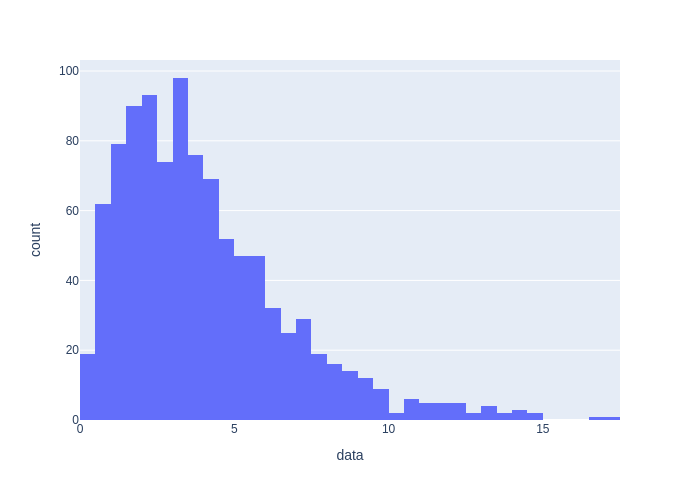

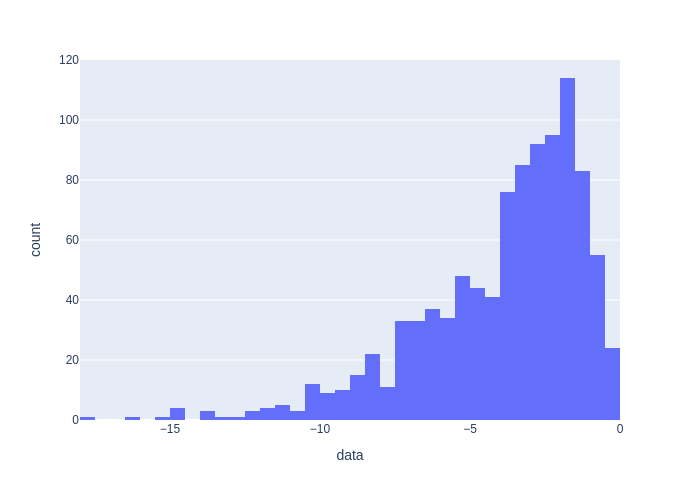

In [20]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

So the way I understand it, when a graph is right skewed, there are a couple of really large numbers that make the graph have to extend far into the right. Those couple of large numbers would make the mean much higher since they would increase the sum of all values by a very large amount, but since the amount of numbers that have a high number are relatively few, the median would remain about the same as if those numbers didn't exist. For this reason the right skewed distribution would would have a higher mean then it would median.
By that same logic when a graph is left skewed, there are a couple of really small numbers that make the graph have to extend far into the left. Those couple of small numbers would make the mean much lower since they would increase the sum of all values by a very small amount, but since the amount of numbers that have a small number are relatively few, the median would remain about the same as if those numbers didn't exist. For this reason the left skewed distribution would would have a smaller mean then it would median.

I modified the code used above to show the mean and median for the different distributions.

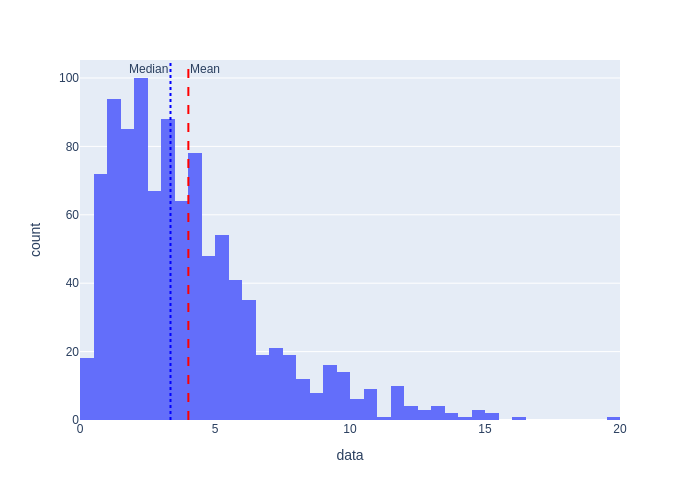

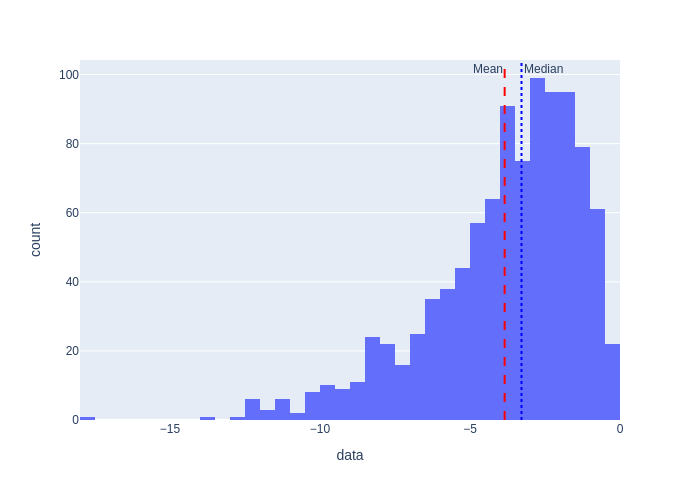

In [25]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Calculate mean and median
mean_value1 = sample1.mean()
median_value1 = np.quantile(sample1, 0.5)
# Add vertical line for mean
fig1.add_vline(x=mean_value1, line=dict(color='red', dash='dash'), annotation_text='Mean', annotation_position="top right")

# Add vertical line for median
fig1.add_vline(x=median_value1, line=dict(color='blue', dash='dot'), annotation_text='Median', annotation_position="top left")

fig1.show(renderer="png")

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

# Calculate mean and median
mean_value2 = sample2.mean()
median_value2 = np.quantile(sample2, 0.5)
# Add vertical line for mean
fig2.add_vline(x=mean_value2, line=dict(color='red', dash='dash'), annotation_text='Mean', annotation_position="top left")

# Add vertical line for median
fig2.add_vline(x=median_value2, line=dict(color='blue', dash='dot'), annotation_text='Median', annotation_position="top right")

fig2.show(renderer="png")

# QUESTION 6

I decided to use a dataset showing a bunch of different Olympic data. The first thing I did is have ChatGPT model when countries would win medals over the years. The code:

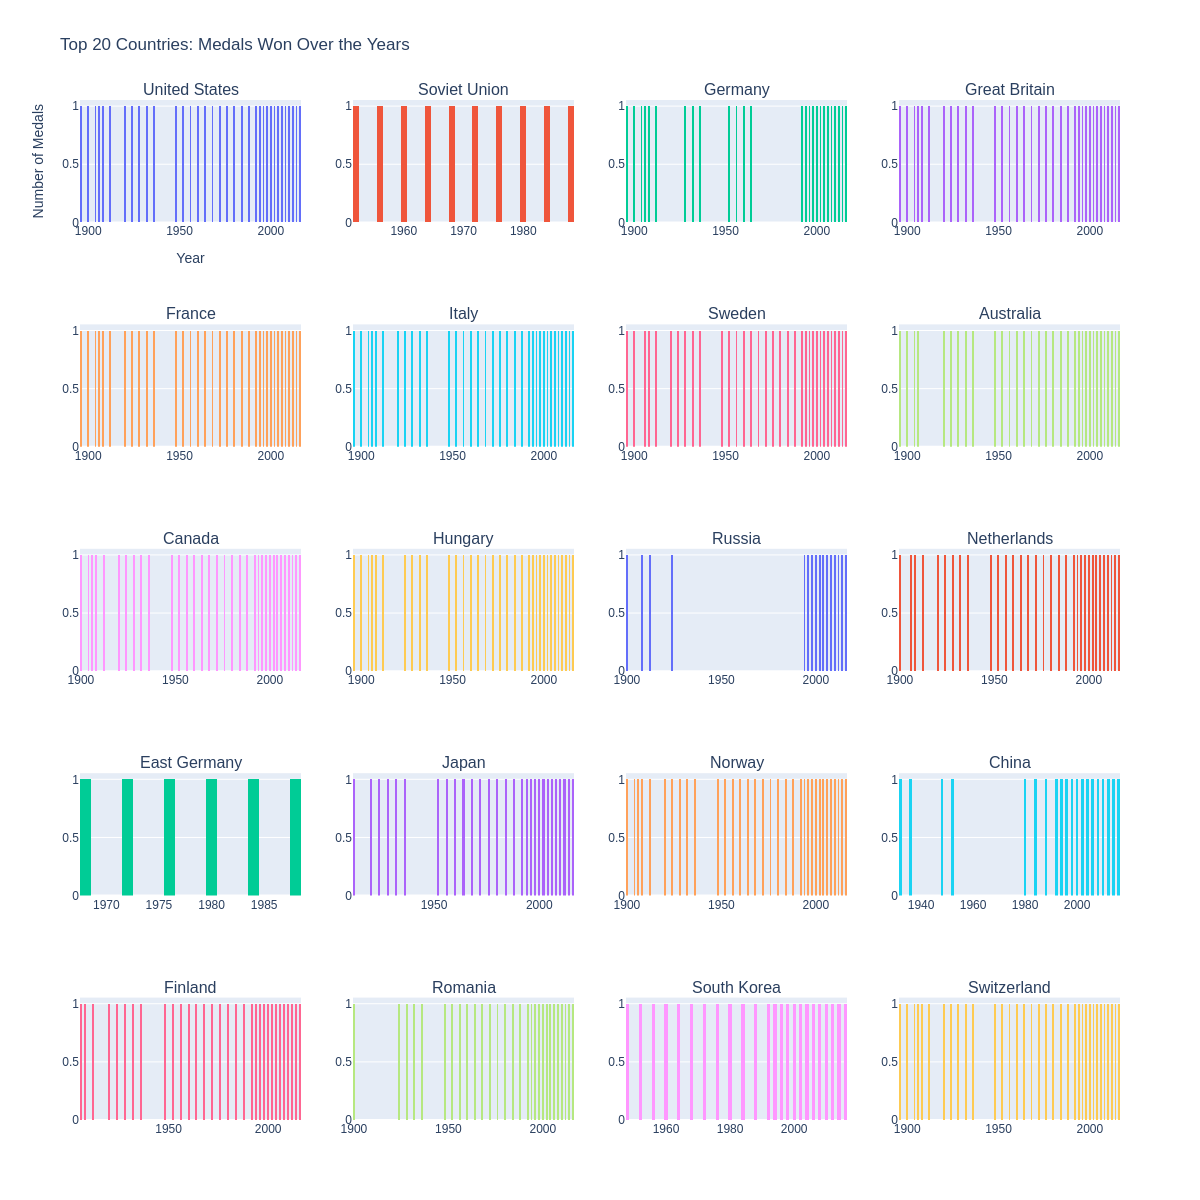

In [32]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv"
olympics_df = pd.read_csv(url)

# Group by country (team) and year to get the count of medals won each year
medals_per_year = olympics_df.groupby(['team', 'year'])['medal'].count().reset_index()
medals_per_year = medals_per_year.rename(columns={'medal': 'Total_Medals'})

# Get the top 20 countries by total medal count
top_countries = (medals_per_year.groupby('team')['Total_Medals'].sum()
                 .sort_values(ascending=False).head(20).index)

# Filter the dataset for these top 20 countries
top_medals_per_year = medals_per_year[medals_per_year['team'].isin(top_countries)]

# Create subplots for each country
fig = make_subplots(rows=5, cols=4, subplot_titles=top_countries)

# Set the desired number of bins (e.g., one bin per year)
desired_bin_size = 1

# Iterate through the top countries and add a histogram for each
row = col = 1
for country in top_countries:
    country_data = top_medals_per_year[top_medals_per_year['team'] == country]
    fig.add_trace(
        go.Histogram(
            x=country_data['year'], 
            y=country_data['Total_Medals'],
            name=country,
            xbins=dict(size=desired_bin_size),  # Set bin size
            showlegend=False
        ), 
        row=row, col=col
    )
    
    # Update row and column index
    col += 1
    if col > 4:  # Move to next row after 4 columns
        col = 1
        row += 1

# Update layout
fig.update_layout(
    title_text="Top 20 Countries: Medals Won Over the Years",
    height=1200, width=1200,
    xaxis_title="Year",
    yaxis_title="Number of Medals",
    showlegend=False
)

# Show the plot
fig.show(renderer="png")


From this I managed to see a bunch of super interesting stuff, like that the Russian empire had actually won olympic medals before it became the soviet union. It also seems like the data models imperial Russia and modern day Russia to be the same country. Germany has some pretty obvious gaps in it with WW1 and WW2 both being clearly represented, but the really surprising thing is that East Germany actually managed to snag a couple of medals for itself. Also, there are some clear missing gaps in the data for different countries, but it depends which gaps are where for each country although WW2 is clearly visible in the data, because theres a gap in most of the countries right before the 1950 mark where nobody won any medals, obviously because everyone was busy fighting WW2.

I also investigated the age distribution of athletes over all the years, the code is here:

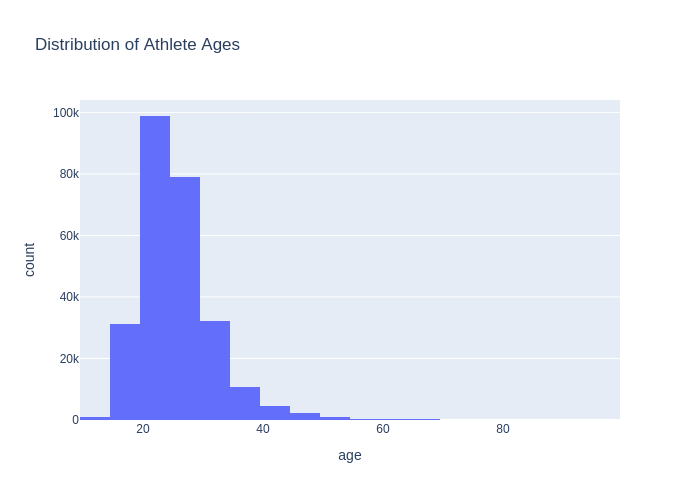

In [34]:
import pandas as pd
import plotly.express as px

# Assuming olympics_df is already loaded
fig = px.histogram(olympics_df, x='age', nbins=30, title='Distribution of Athlete Ages')
fig.show(renderer="png")


This was kind of expected, but there are a couple of very weird standouts. It seems like there were a couple of athletes that were in mid 60s when they competed in the olympics, and this actually made me super curious so I googled it and the oldest person to ever compete in the olympics was 72 years old who was a shooter and won 6 olympic medals over his career. On the other hand there seem to be a couple more younger athletes who were in their late teens by the looks of it, so I also googled this and the youngest person who ever competed in the olympics was a 10 year old, which kind of makes me ashamed of what I've done with my life, but that's still impressive.

The last thing that I wanted to investigate who the most dominant olympic athletes were in their sports. Code:

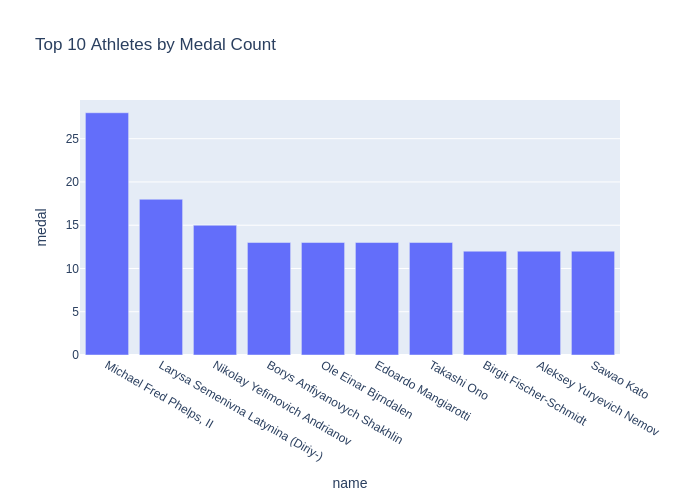

In [44]:
top_athletes = olympics_df.groupby('name')['medal'].count().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_athletes, x='name', y='medal', title='Top 10 Athletes by Medal Count')
fig.show(renderer="png")


I always had an idea that Michael Phelps was one of the greatest swimmers ever, but this graph really put it into perspective, because he nearly doubles the amount of medals of the 10th place person, even though they both dominated their sports Michael Phelps was clearly in a league of his own when it came to his sport.

I asked ChatGPT to help me model model distribution by age in a KDE, and this is the code I got:

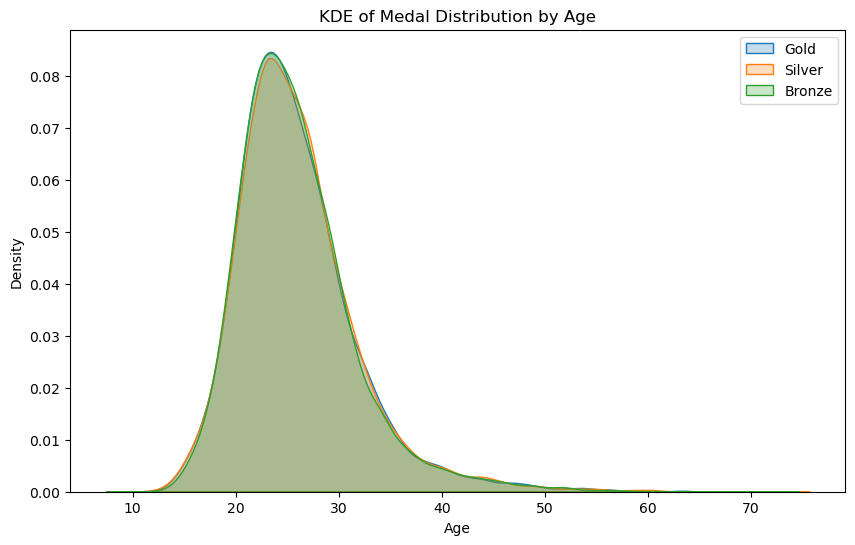

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv"
olympics_df = pd.read_csv(url)

# KDE plot of age distribution for medal winners
plt.figure(figsize=(10, 6))
sns.kdeplot(olympics_df[olympics_df['medal'] == 'Gold']['age'], label='Gold', fill=True)
sns.kdeplot(olympics_df[olympics_df['medal'] == 'Silver']['age'], label='Silver', fill=True)
sns.kdeplot(olympics_df[olympics_df['medal'] == 'Bronze']['age'], label='Bronze', fill=True)
plt.title('KDE of Medal Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

I honestly thought that the distribution would be much more interesting, but this data is pretty similar to just the general age graph. The only thing worth noticing is that if you zoom in all the way into the very oldest people is that the oldest people don't win any gold, but the oldest person there did seem to win a silver. Also out of all the age groups, the only place where people win more golds than any other medal (from what I could see) is around 48, if you zoom in on there yoiu can see a little bit of blue poking out whereas it gets buried by the other two medals in all the other parts of the graph. I also love the implication that you're most likely to win a gold medal when compared to other people of your age group, at the age of 48-49.

Overall this data didn't really reveal too much information that I didn't already know, but it did highlight a couple of things that I didn't know and made me curious enough to google some things. Even if I did already know much of the data seeing it visualized was pretty cool. 

# QUESTION 7

Watched the video, this is the graph I needed to use and I played around with the templates and used the one I liked the most.

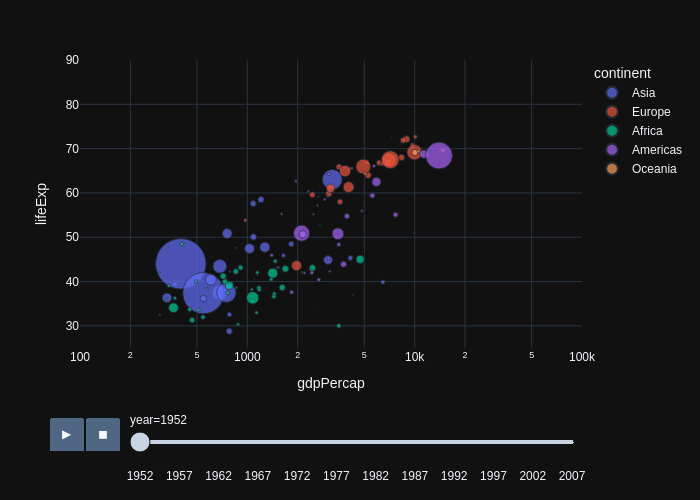

In [12]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country", template = "plotly_dark",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer = "png")

# QUESTION 8

As requested the second modified version of the code:

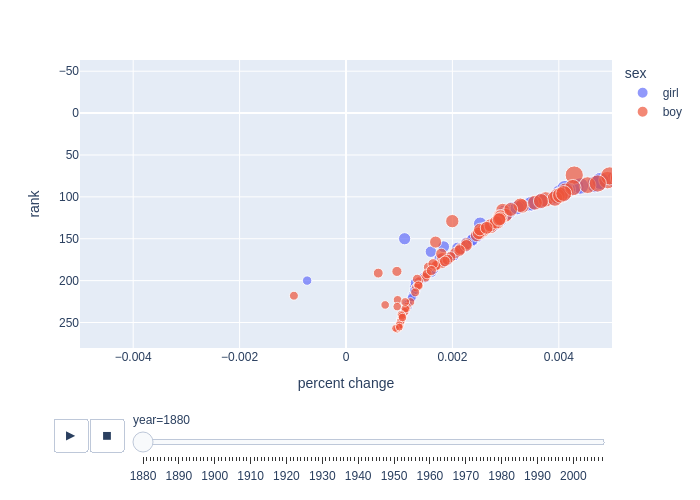

In [11]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# QUESTION 9

Yes.

# ChatGPT Summary For Questions 5-9

### Conversation Summary

The session began with an inquiry into the relationship between mean, median, and skewness in statistical distributions. You asked why the mean and median differ in skewed distributions, prompting a detailed explanation of the influence of outliers. You then provided Python code to generate histograms using data from the gamma distribution and faced issues adding mean and median lines. We resolved this by correctly integrating `plotly` methods.

Next, you asked about visualizing the Olympic dataset, specifically the total medals won by each country. I provided code to aggregate and visualize the data using histograms. You wanted multiple histograms for the top 20 countries, which we created using subplots.

Further, you faced issues with large bin sizes in the histogram, which we resolved by adjusting bin parameters. I suggested other interesting visualizations, like gender representation over time and top athletes by medal count.

When you encountered a deprecated parameter warning in Seaborn’s KDE plot, I provided updated syntax to remove the warning. Finally, I summarized the diverse topics covered, from statistical concepts to visualization techniques and troubleshooting code issues.

ChatGPT Link:
https://chatgpt.com/share/66f345a5-1740-8011-9b71-f35a4a2a24e9